In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.3
v tibble  3.0.0     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
data_mat <- read_csv2('dados/student-mat.csv',
                 col_types = cols(.default = col_character()))
data_port <- read_csv2('dados/student-por.csv',
                 col_types = cols(.default = col_character()))

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.



In [3]:
sdata_num_mat <- 
  data_mat %>%
  type_convert() %>%
  select(age, absences, G1, G2, G3) %>%
  pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
  group_by(Feature, Value) %>%
  summarize(Freq = n())

sdata_num_port <- 
  data_port %>%
  type_convert() %>%
  select(age, absences, G1, G2, G3) %>%
  pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
  group_by(Feature, Value) %>%
  summarize(Freq = n())

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column s

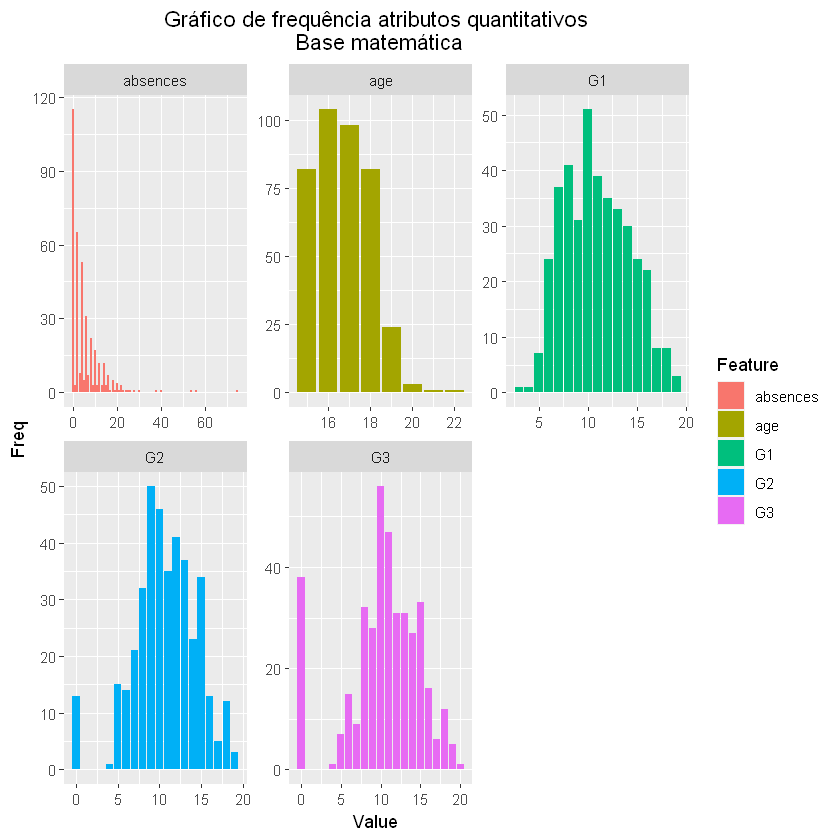

In [4]:
ggplot(sdata_num_mat, aes(x = Value, y = Freq, fill = Feature)) +
  geom_bar(stat = "identity") +
  facet_wrap(vars(Feature), scales = "free") +
  ggtitle("Gráfico de frequência atributos quantitativos\n Base matemática") +
  theme(plot.title = element_text(hjust = 0.5))

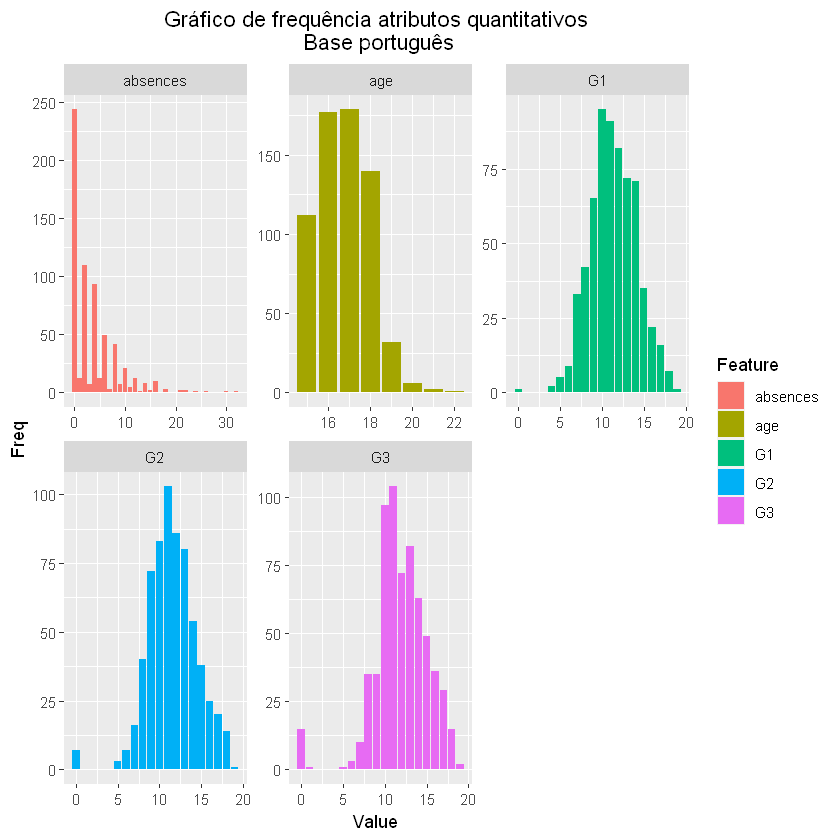

In [5]:
ggplot(sdata_num_port, aes(x = Value, y = Freq, fill = Feature)) +
  geom_bar(stat = "identity") +
  facet_wrap(vars(Feature), scales = "free") +
  ggtitle("Gráfico de frequência atributos quantitativos\n Base português") +
  theme(plot.title = element_text(hjust = 0.5))

In [6]:
sdata_qual_mat_1 <- 
  data_mat %>%
  select(-c(age, absences, G1, G2, G3)) %>%
  select(-c(Mjob, Fjob, reason, guardian)) %>%
  select(c(1:12)) %>%
  pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
  group_by(Feature, Value) %>%
  summarize(Freq = n())

sdata_qual_mat_2 <- 
  data_mat %>%
  select(-c(age, absences, G1, G2, G3)) %>%
  select(-c(Mjob, Fjob, reason, guardian)) %>%
  select(c(13:24)) %>%
  pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
  group_by(Feature, Value) %>%
  summarize(Freq = n())

sdata_qual_mat_3 <- 
  data_mat %>%
  select(-c(age, absences, G1, G2, G3)) %>%
  select(Mjob, Fjob, reason, guardian) %>%
  pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
  group_by(Feature, Value) %>%
  summarize(Freq = n())

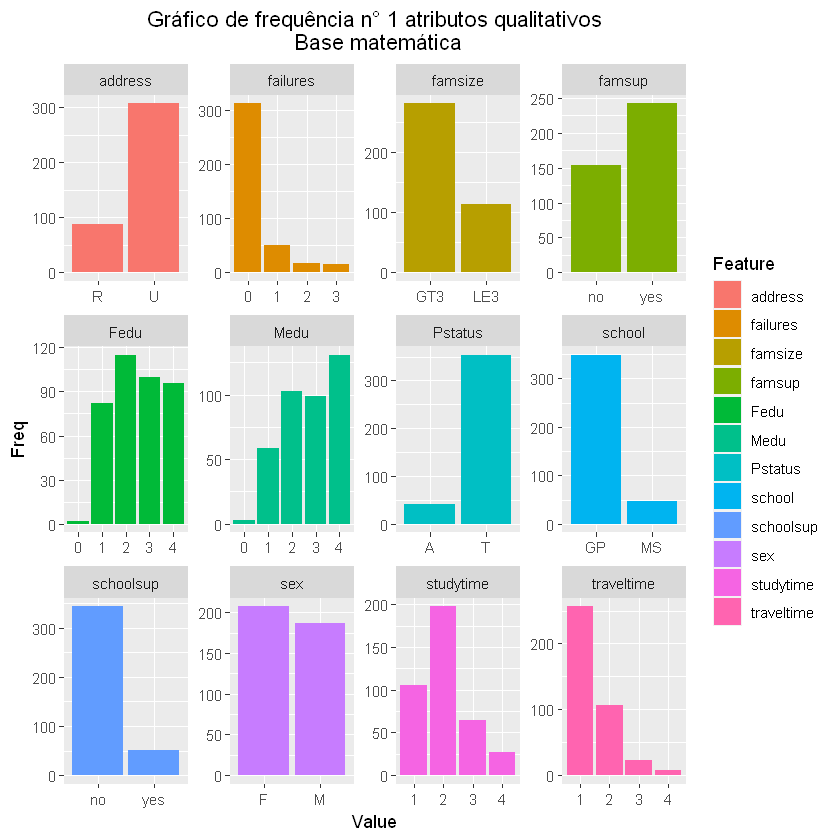

In [7]:
ggplot(sdata_qual_mat_1, aes(x = Value, y = Freq, fill = Feature)) +
  geom_bar(stat = "identity") +
  facet_wrap(vars(Feature), scales = "free") +
  ggtitle("Gráfico de frequência n° 1 atributos qualitativos\n Base matemática") +
  theme(plot.title = element_text(hjust = 0.5))

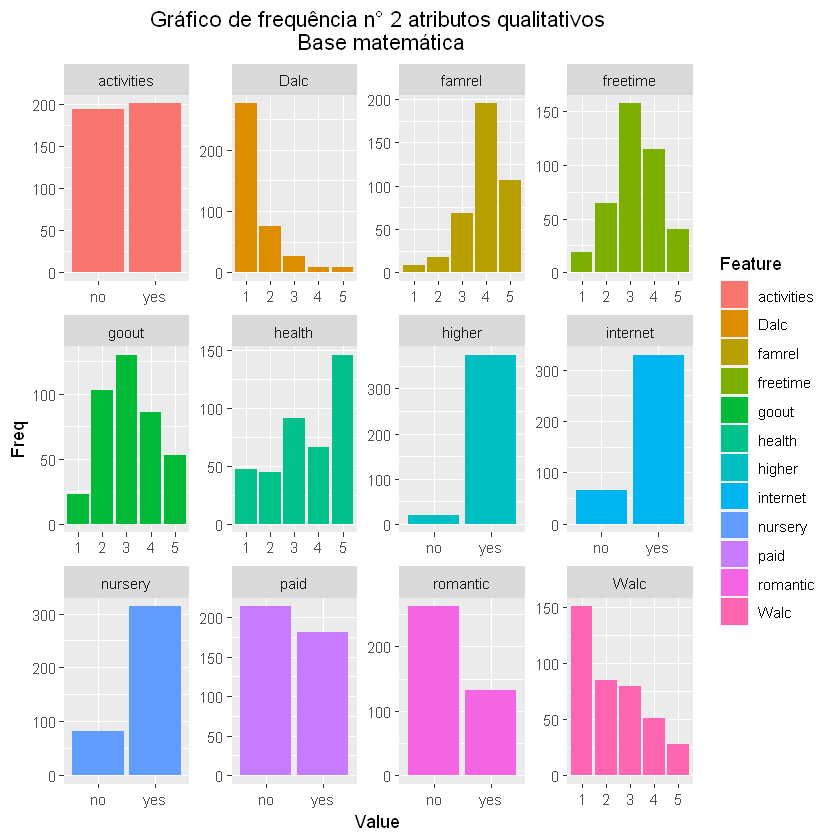

In [8]:
ggplot(sdata_qual_mat_2, aes(x = Value, y = Freq, fill = Feature)) +
  geom_bar(stat = "identity") +
  facet_wrap(vars(Feature), scales = "free") +
  ggtitle("Gráfico de frequência n° 2 atributos qualitativos\n Base matemática") +
  theme(plot.title = element_text(hjust = 0.5))

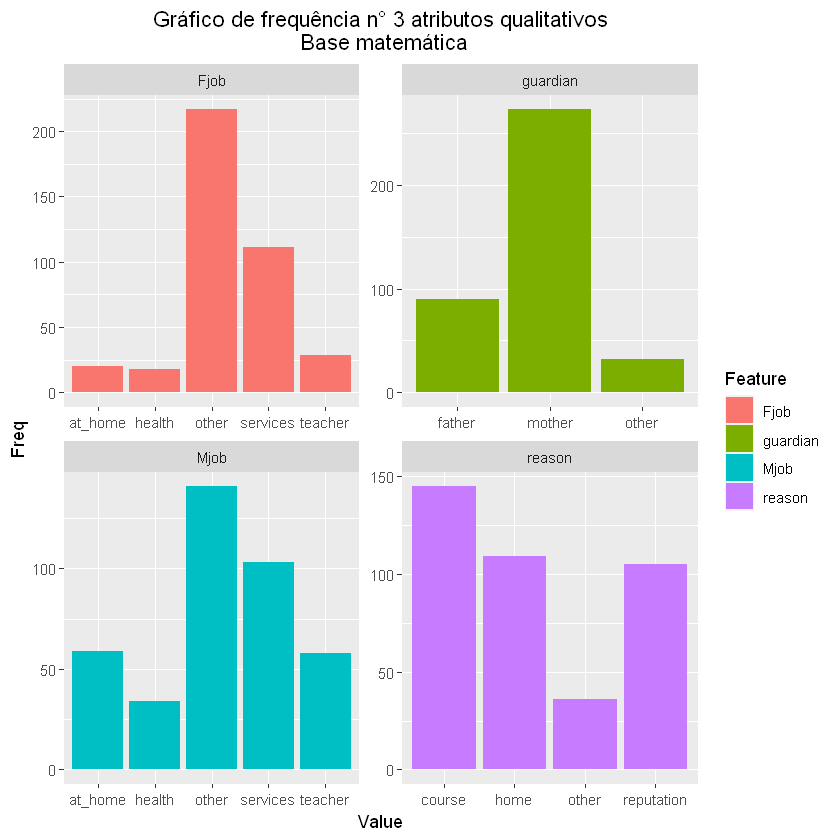

In [9]:
ggplot(sdata_qual_mat_3, aes(x = Value, y = Freq, fill = Feature)) +
  geom_bar(stat = "identity") +
  facet_wrap(vars(Feature), scales = "free") +
  ggtitle("Gráfico de frequência n° 3 atributos qualitativos\n Base matemática") +
  theme(plot.title = element_text(hjust = 0.5))

In [10]:
sdata_qual_port_1 <- 
  data_port %>%
  select(-c(age, absences, G1, G2, G3)) %>%
  select(-c(Mjob, Fjob, reason, guardian)) %>%
  select(c(1:12)) %>%
  pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
  group_by(Feature, Value) %>%
  summarize(Freq = n())

sdata_qual_port_2 <- 
  data_port %>%
  select(-c(age, absences, G1, G2, G3)) %>%
  select(-c(Mjob, Fjob, reason, guardian)) %>%
  select(c(13:24)) %>%
  pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
  group_by(Feature, Value) %>%
  summarize(Freq = n())

sdata_qual_port_3 <- 
  data_port %>%
  select(-c(age, absences, G1, G2, G3)) %>%
  select(Mjob, Fjob, reason, guardian) %>%
  pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
  group_by(Feature, Value) %>%
  summarize(Freq = n())

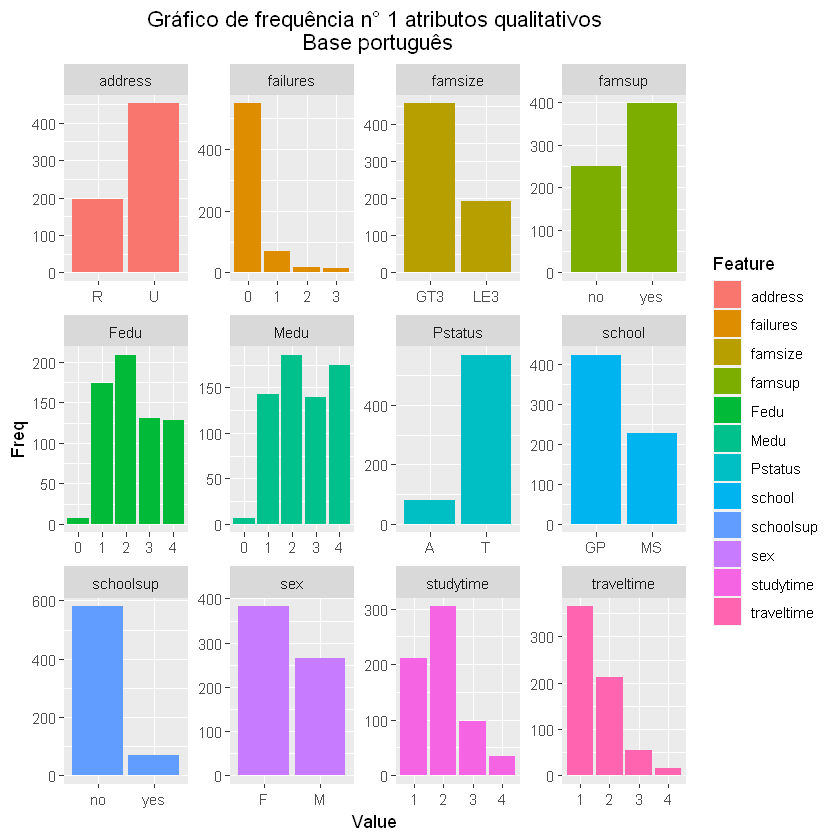

In [11]:
ggplot(sdata_qual_port_1, aes(x = Value, y = Freq, fill = Feature)) +
  geom_bar(stat = "identity") +
  facet_wrap(vars(Feature), scales = "free") +
  ggtitle("Gráfico de frequência n° 1 atributos qualitativos\n Base português") +
  theme(plot.title = element_text(hjust = 0.5))

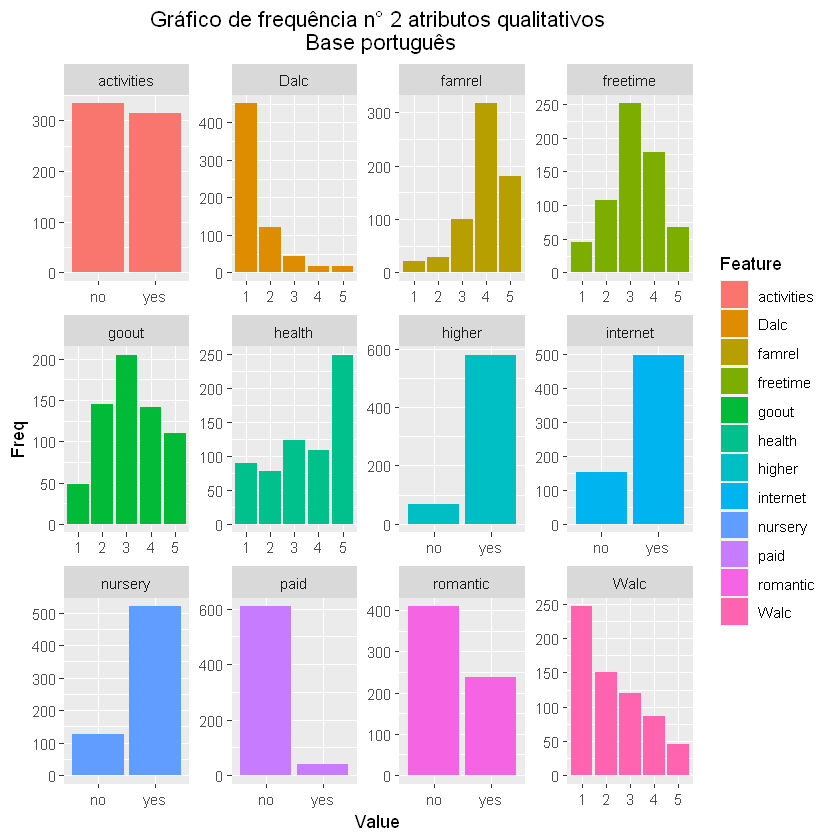

In [12]:
ggplot(sdata_qual_port_2, aes(x = Value, y = Freq, fill = Feature)) +
  geom_bar(stat = "identity") +
  facet_wrap(vars(Feature), scales = "free") +
  ggtitle("Gráfico de frequência n° 2 atributos qualitativos\n Base português") +
  theme(plot.title = element_text(hjust = 0.5))

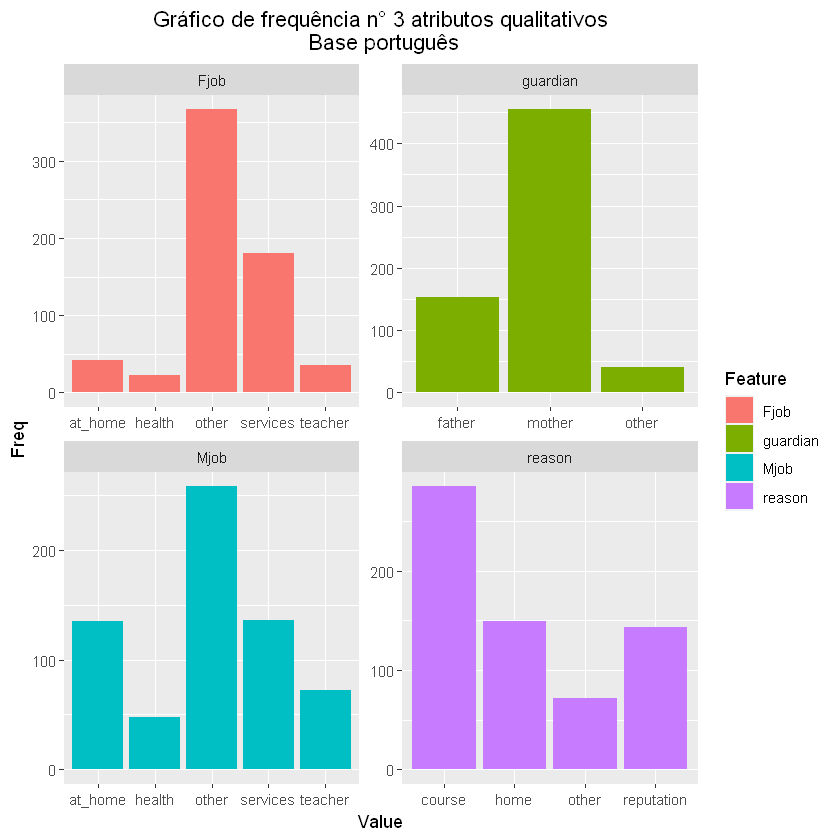

In [13]:
ggplot(sdata_qual_port_3, aes(x = Value, y = Freq, fill = Feature)) +
  geom_bar(stat = "identity") +
  facet_wrap(vars(Feature), scales = "free") +
  ggtitle("Gráfico de frequência n° 3 atributos qualitativos\n Base português") +
  theme(plot.title = element_text(hjust = 0.5))

In [4]:
sdata_qual_port_1 <- 
  data_port %>%
  select(-c(age, absences, G1, G2, G3)) %>%
  select(schoolsup, famsup, failures, paid) %>%
  pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
  group_by(Feature, Value) %>%
  summarize(Freq = n())

sdata_qual_port_2 <- 
  data_port %>%
  select(-c(age, absences, G1, G2, G3)) %>%
  select(activities, freetime, studytime, health) %>%
  pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
  group_by(Feature, Value) %>%
  summarize(Freq = n())



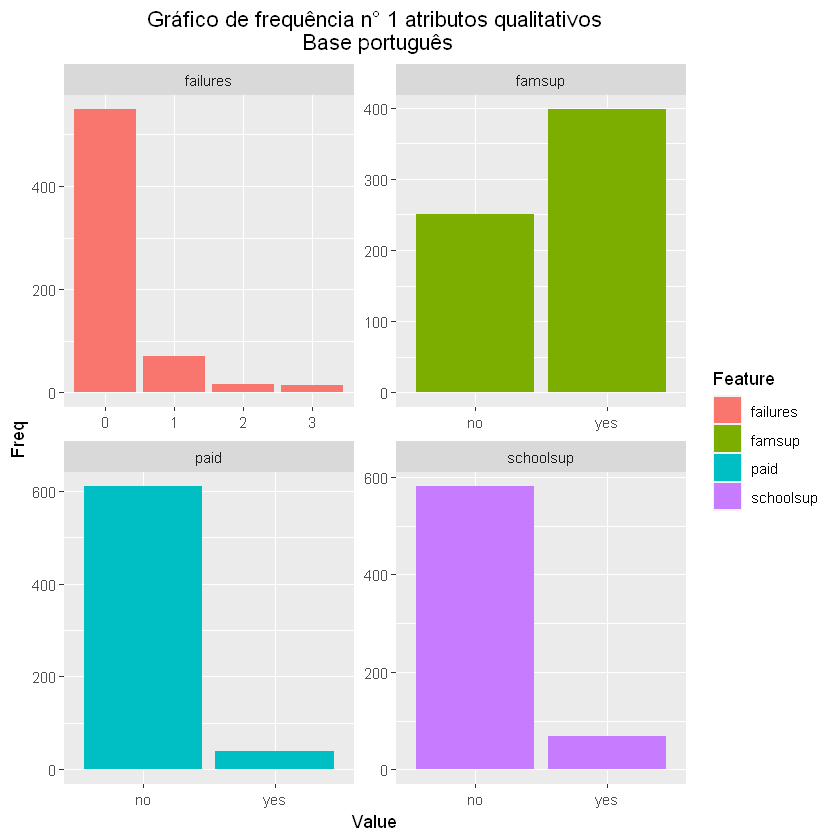

In [5]:
ggplot(sdata_qual_port_1, aes(x = Value, y = Freq, fill = Feature)) +
  geom_bar(stat = "identity") +
  facet_wrap(vars(Feature), scales = "free") +
  ggtitle("Gráfico de frequência n° 1 atributos qualitativos\n Base português") +
  theme(plot.title = element_text(hjust = 0.5))

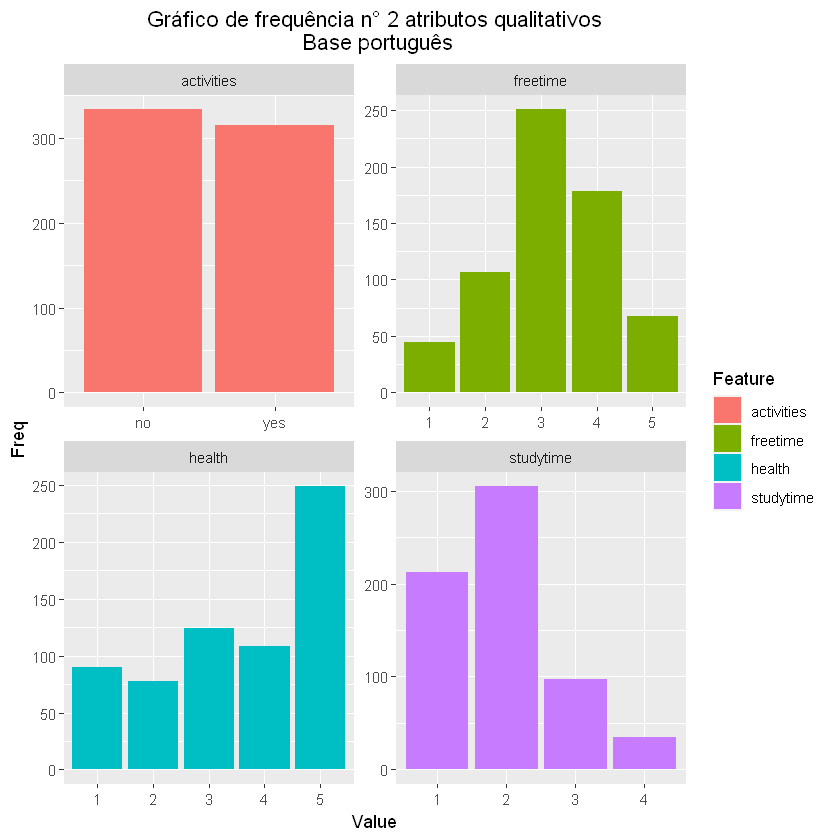

In [6]:
ggplot(sdata_qual_port_2, aes(x = Value, y = Freq, fill = Feature)) +
  geom_bar(stat = "identity") +
  facet_wrap(vars(Feature), scales = "free") +
  ggtitle("Gráfico de frequência n° 2 atributos qualitativos\n Base português") +
  theme(plot.title = element_text(hjust = 0.5))